### **Классификация текстов на основе TF-IDF и Naive Bayes**


#### Практическая задача

Используя корпус данных новостей, выполните следующую последовательность шагов:

1. Загрузите и предобработайте данные: удалите стоп-слова, проведите лемматизацию/стемминг, преобразуйте все буквы в нижний регистр.
2. Создайте матрицу TF-IDF для вашего набора данных.
3. Разделите данные на тренировочный и тестовый наборы.
4. Постройте модель Naive Bayes на основе тренировочного набора.
5. Проверьте точность модели на тестовом наборе.
6. Проанализируйте результаты и сделайте выводы о качестве классификации.

#### Указания по выполнению

1. Используйте библиотеку `sklearn` для реализации TF-IDF и Naive Bayes.
2. Выберите подходящий корпус данных, например, новостные статьи или отзывы.
3. Проведите сравнительный анализ различных параметров модели (количество признаков, пороговые значения и т.д.) и выберите оптимальный вариант.
4. Подготовьте отчет, включающий код, графики и таблицы с результатами экспериментов.

In [ ]:
%pip install re >>None
%pip install nltk >>None
%pip install unicodedata >>None
%pip install contractions >>None
%pip install inflect >>None
%pip install emoji >>None
%pip install datasets >>None

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_syste

In [ ]:
import re
import nltk
import emoji
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import contractions
import time

from sklearn.datasets import fetch_rcv1
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datasets import load_dataset
import string

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
dataset = load_dataset('dbpedia_14')
selected_classes = [0, 1, 2, 3, 4, 5]
filtered_data = dataset['train'].filter(lambda example: example['label'] in selected_classes)
lemmatizer = WordNetLemmatizer()

def preprocess_text(input_text):
    clean_text = re.sub('<[^<]+?>', '', input_text)

    clean_text = re.sub(r'\d+', '', clean_text)

    clean_text = re.sub(r'http\S+', '', clean_text)

    clean_text = clean_text.lower()

    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    clean_text = re.sub(r'[@#$%^&*><\'\“\"\≈\—\«\»\–\α]', '', clean_text)

    clean_text = re.sub(r'\s+', ' ', clean_text)

    clean_text = re.sub(r'et al', '', clean_text)

    clean_text = re.sub(r'\b[a-zA-Z]\b', '', clean_text)

    clean_text = re.sub(r'i{2,}', '', clean_text)

    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join([word for word in clean_text.split() if word not in stop_words])

    clean_text = ' '.join([lemmatizer.lemmatize(word) for word in clean_text.split() if word not in stop_words])

    return clean_text
processed_data = [preprocess_text(text) for text in filtered_data['content']]
labels = filtered_data['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X = vectorizer.fit_transform(processed_data)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.9717
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7879
           1       0.98      0.98      0.98      7888
           2       0.94      0.97      0.96      8034
           3       0.99      0.99      0.99      7873
           4       0.98      0.96      0.97      8187
           5       0.98      0.99      0.98      8139

    accuracy                           0.97     48000
   macro avg       0.97      0.97      0.97     48000
weighted avg       0.97      0.97      0.97     48000



Alpha: 0.001, Accuracy: 0.9610
Alpha: 0.01, Accuracy: 0.9622
Alpha: 0.1, Accuracy: 0.9628
Alpha: 1.0, Accuracy: 0.9641


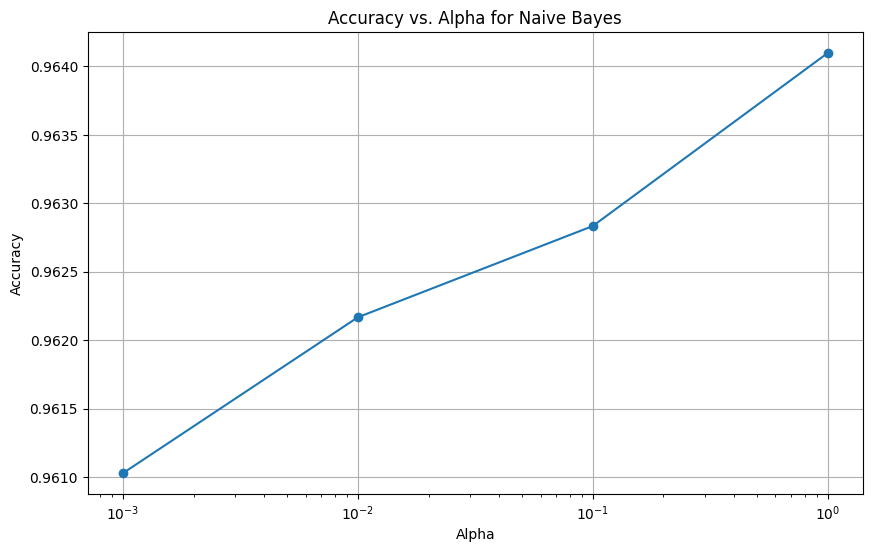

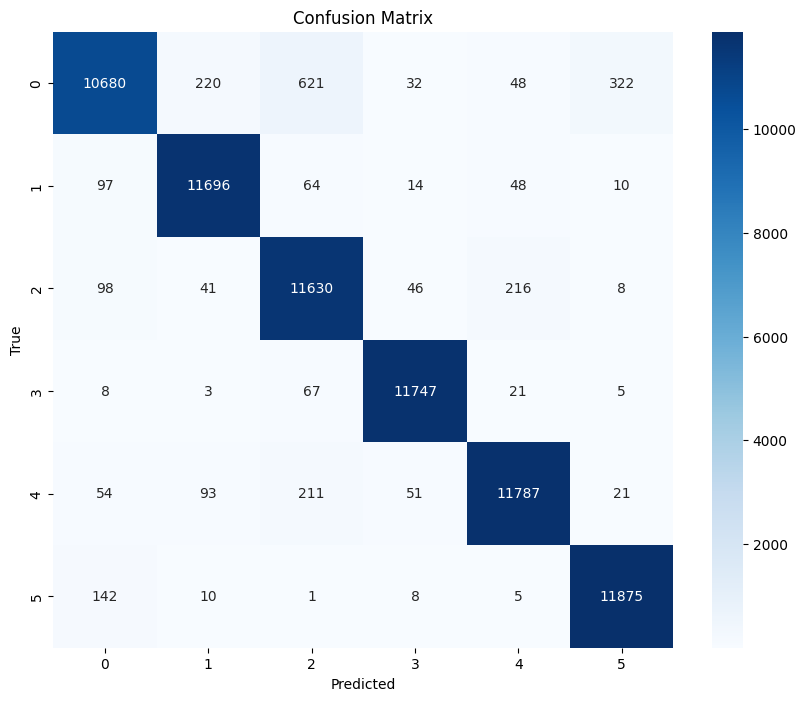

Best Alpha: 1.0
              precision    recall  f1-score   support

     Class 0       0.96      0.90      0.93     11923
     Class 1       0.97      0.98      0.97     11929
     Class 2       0.92      0.97      0.94     12039
     Class 3       0.99      0.99      0.99     11851
     Class 4       0.97      0.96      0.97     12217
     Class 5       0.97      0.99      0.98     12041

    accuracy                           0.96     72000
   macro avg       0.96      0.96      0.96     72000
weighted avg       0.96      0.96      0.96     72000



In [ ]:
alphas = [0.001, 0.01, 0.1, 1.0]
accuracies = []

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Alpha: {alpha}, Accuracy: {accuracy:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Naive Bayes')
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmax(accuracies)]
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f'Best Alpha: {best_alpha}')
print(classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in selected_classes]))

Лабораторная работа №2: Выделение именованных сущностей с использованием библиотеки spaCy
Теоретическая часть
Выделение именованных сущностей (NER) – это процесс идентификации и классификации именованных сущностей в тексте, таких как имена людей, организации, места, даты и т.д. Библиотека spaCy предоставляет мощные инструменты для выполнения этой задачи.

Практическая задача
Используя корпус данных новостей, выполните следующую последовательность шагов:

Установите и импортируйте библиотеку spaCy.
Загрузите предварительно обученную модель английского языка (en_core_web_sm).
Предобработайте текст: удалите лишние символы, проведите токенизацию.
Выполните NER на каждом документе.
Сохраните результаты в формате JSON или CSV.
Проанализируйте полученные данные и найдите наиболее часто встречающиеся сущности.
Указания по выполнению
Используйте функцию nlp.pipe() для пакетной обработки документов.
Экспериментируйте с различными моделями spaCy, чтобы найти лучшую производительность.
Постройте график распределения частот именованных сущностей.
Подготовьте отчет, включающий код, примеры выделенных сущностей и анализ полученных результатов.

In [ ]:
import spacy
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
path = kagglehub.dataset_download("shivamtaneja2304/inshorts-dataset-english")
df = pd.read_csv(path + '/english_news_dataset.csv')
nlp = spacy.load("en_core_web_lg")

Загрузка датасета...
Обработка новостей...


  0%|          | 0/500 [00:00<?, ?it/s]

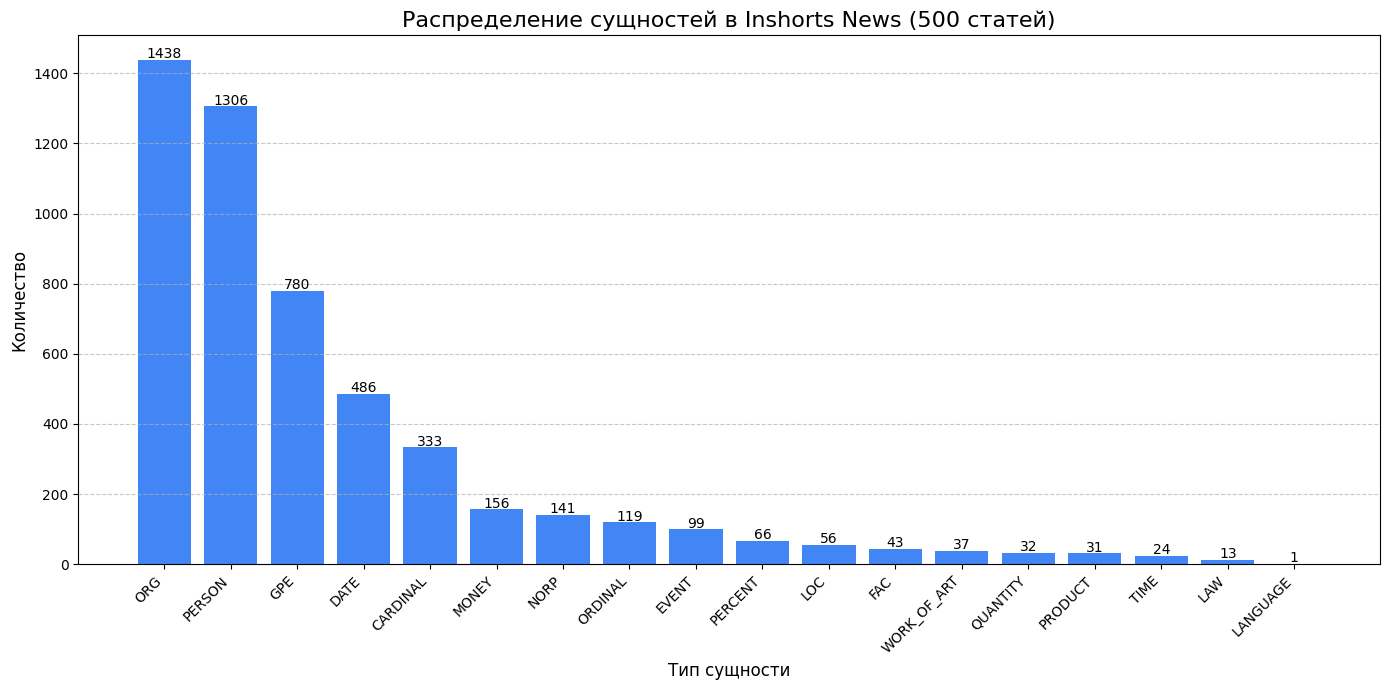


Топ-10 сущностей в новостях Inshorts:
+--------------+------------+-----------------------------------------------------------------------------------------------------------------------------------------+
| Тип сущности | Количество |                                                                 Примеры                                                                 |
+--------------+------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|     ORG      |    1438    | Congress Committee, Ratnaveer Precision Engineering, Bhilai, United TelecomsThe National Company Law Appellate Tribunal, Gurner Group's |
|    PERSON    |    1306    |                                   Recep Tayyip Erdogan, Vasan, Varun Gandhi, Gautam Adani, Chowdhury                                    |
|     GPE      |    780     |                                             Bhilai, Pakistan, Uttar Pradesh, Thane, Bhopal 

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        if len(ent.text.strip()) > 2:
            entities[ent.label_].append(ent.text.strip())
    return entities

print("Обработка новостей...")
all_entities = defaultdict(list)
for text in tqdm(df['Headline'][:500] + df['Content'][:500]):
    entities = extract_entities(str(text))
    for label, texts in entities.items():
        all_entities[label].extend(texts)


entity_counts = {label: len(texts) for label, texts in all_entities.items()}
sorted_counts = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

results = []
for label, count in sorted_counts:
    unique_entities = list(set(all_entities[label]))[:5]
    results.append({
        'Тип сущности': label,
        'Количество': count,
        'Примеры': ', '.join(unique_entities)
    })

df_results = pd.DataFrame(results)

plt.figure(figsize=(14, 7))
plt.bar(df_results['Тип сущности'], df_results['Количество'], color='#4285F4')
plt.title('Распределение сущностей в Inshorts News (500 статей)', fontsize=16)
plt.xlabel('Тип сущности', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(df_results['Количество']):
    plt.text(i, val + 5, str(val), ha='center')

plt.tight_layout()
plt.savefig('inshorts_entities.png', dpi=120)
plt.show()

print("\nТоп-10 сущностей в новостях Inshorts:")
print(df_results.head(10).to_markdown(index=False, tablefmt="pretty"))